# Skopje Air Pollution

## Introduction

The city of Skopje is well known for its struggles with poor air quality, especially in the winter months. The main pollutants are CO, NO2, ozone, and particulate matter of different dimensions.

Monitoring stations for measuring the concentrations of each of the main pollutants have been installed in different locations around the city.

## Import Libraries
Before we begin, let us import the libraries that we will be using (Pandas, matplotlib and seaborn). Any additional libraries that we decide to import we will add in this cell.

In [9]:
# import libraries
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## The Dataset
The following data has been taken from kaggle (https://www.kaggle.com/datasets/cokastefan/pm10-pollution-data-in-skopje-from-2008-to-2018) where data from the monitoring stations (https://air.moepp.gov.mk/?page_id=175) for the period from Janaury 2007 to December 2018 has been compiled in a single dataset. To make our task more managable, we will only be looking at data for the time period of five years, from January 2012 to December 2016.

## Import data
The data is contained in the directory CSVs in the files (CO.csv, NO2.csv, O3.csv, PM10.csv, and PM25.csv). Let's import the data from the CSV files as separate pandas dataframes.

In [10]:
import os 
cwd=os.getcwd()
print(cwd)

C:\Users\Lenovo\Desktop\03 Air Pollution Scenario


In [11]:
# Read files into dataframes
co_df = pd.read_csv('CO.csv')
no2_df = pd.read_csv('NO2.csv')
o3_df = pd.read_csv('O3.csv')
pm10_df = pd.read_csv('PM10.csv')
pm25_df = pd.read_csv('PM25.csv')


## Review Data
Let's display each of the dataframes and look at the data types in order to get a sense of the data. Check that the data types are accurate.

In [12]:
# Display dataframes and check data types
print("CO DataFrame:")
print(co_df.head())
print("")

print("NO2 DataFrame:")
print(no2_df.head())
print("")

print("O3 DataFrame:")
print(o3_df.head())
print("")

print("PM10 DataFrame:")
print(pm10_df.head())
print("")

print("PM25 DataFrame:")
print(pm25_df.head())
print("")

# Check the data types of each DataFrame
print("Data Types:")
print("CO DataFrame:")
print(co_df.dtypes)
print("")

print("NO2 DataFrame:")
print(no2_df.dtypes)
print("")

print("O3 DataFrame:")
print(o3_df.dtypes)
print("")

print("PM10 DataFrame:")
print(pm10_df.dtypes)
print("")

print("PM25 DataFrame:")
print(pm25_df.dtypes)

CO DataFrame:
   Unnamed: 0.1  Unnamed: 0  Centar  GaziBaba  Karpos  Lisice  Miladinovci  \
0         36212       36212  0.2876    0.9219  0.5644     NaN          NaN   
1         36213       36213  0.1538    1.2029  0.8275     NaN       0.3858   
2         36214       36214  0.1600    1.3198  0.7423     NaN       0.3346   
3         36215       36215  0.1699    1.1449  0.4445     NaN       0.3549   
4         36216       36216  0.1539    0.8092  0.5121     NaN       0.2553   

   Mobile  Rektorat                 time  
0     NaN    0.3708  2012-01-01 00:00:00  
1     NaN    0.4097  2012-01-01 01:00:00  
2     NaN    0.4061  2012-01-01 02:00:00  
3     NaN    0.6500  2012-01-01 03:00:00  
4     NaN    0.7198  2012-01-01 04:00:00  

NO2 DataFrame:
   Unnamed: 0.1  Unnamed: 0   Centar  GaziBaba   Karpos   Lisice  Miladinovci  \
0         36212       36212  27.5615       NaN  31.1979  40.2691          NaN   
1         36213       36213  16.1041       NaN  34.4904  33.3520          NaN   


## Data cleaning and restructuring
Because the mobile column is from a mobile monitoring station located in the municipality of Butel and occasionally displaced, we can drop that column.

We can also rename the column time to datetime and create additional separate time and date columns. 

We can add a column in each of the dataframes indicating the type of pollutant and concatenate the dataframes.

In [13]:
#Checking for duplicated rows in all data sets
print(f'Duplicate rows in CO dataset:{co_df.duplicated().sum()}')
print(f'Duplicate rows in NO2 dataset:{no2_df.duplicated().sum()}')
print(f'Duplicate rows in O3 dataset:{o3_df.duplicated().sum()}')
print(f'Duplicate rows in PM10 dataset:{pm10_df.duplicated().sum()}')
print(f'Duplicate rows in PM25 dataset:{pm25_df.duplicated().sum()}')

Duplicate rows in CO dataset:0
Duplicate rows in NO2 dataset:0
Duplicate rows in O3 dataset:0
Duplicate rows in PM10 dataset:0
Duplicate rows in PM25 dataset:0


In [14]:
# Data cleaning and restructuring
# Drop the 'mobile' and 'unnamed 0.1' columns from each DataFrame
co_df.drop('Mobile', axis=1, inplace=True)
no2_df.drop('Mobile', axis=1, inplace=True)
o3_df.drop('Mobile', axis=1, inplace=True)
pm10_df.drop('Mobile', axis=1, inplace=True)
pm25_df.drop('Mobile', axis=1, inplace=True)
co_df.drop('Unnamed: 0.1', axis=1, inplace=True)
no2_df.drop('Unnamed: 0.1', axis=1, inplace=True)
o3_df.drop('Unnamed: 0.1', axis=1, inplace=True)
pm10_df.drop('Unnamed: 0.1', axis=1, inplace=True)
pm25_df.drop('Unnamed: 0.1', axis=1, inplace=True)

# Rename the 'time' column to 'datetime' and create separate 'time' and 'date' columns
co_df.rename(columns={'time': 'datetime'}, inplace=True)
co_df['time'] = pd.to_datetime(co_df['datetime']).dt.time
co_df['date'] = pd.to_datetime(co_df['datetime']).dt.date

no2_df.rename(columns={'time': 'datetime'}, inplace=True)
no2_df['time'] = pd.to_datetime(no2_df['datetime']).dt.time
no2_df['date'] = pd.to_datetime(no2_df['datetime']).dt.date

o3_df.rename(columns={'time': 'datetime'}, inplace=True)
o3_df['time'] = pd.to_datetime(o3_df['datetime']).dt.time
o3_df['date'] = pd.to_datetime(o3_df['datetime']).dt.date


pm10_df.rename(columns={'time': 'datetime'}, inplace=True)
pm10_df['time'] = pd.to_datetime(pm10_df['datetime']).dt.time
pm10_df['date'] = pd.to_datetime(pm10_df['datetime']).dt.date


pm25_df.rename(columns={'time': 'datetime'}, inplace=True)
pm25_df['time'] = pd.to_datetime(pm25_df['datetime']).dt.time
pm25_df['date'] = pd.to_datetime(pm25_df['datetime']).dt.date


# Add a 'pollutant' column indicating the type of pollutant
co_df['pollutant'] = 'CO'
no2_df['pollutant'] = 'NO2'
o3_df['pollutant'] = 'O3'
pm10_df['pollutant'] = 'PM10'
pm25_df['pollutant'] = 'PM25'

co_df.info()
no2_df.info()
o3_df.info()
pm10_df.info()
pm25_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45307 entries, 0 to 45306
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   45307 non-null  int64  
 1   Centar       28020 non-null  float64
 2   GaziBaba     36042 non-null  float64
 3   Karpos       40426 non-null  float64
 4   Lisice       35184 non-null  float64
 5   Miladinovci  23316 non-null  float64
 6   Rektorat     23816 non-null  float64
 7   datetime     45307 non-null  object 
 8   time         45307 non-null  object 
 9   date         45307 non-null  object 
 10  pollutant    45307 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45307 entries, 0 to 45306
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   45307 non-null  int64  
 1   Centar       38043 non-null  float64
 2   G

In [27]:
pollutants_df=pollutants_df.set_index('Unnamed: 0')

KeyError: "None of ['Unnamed: 0'] are in the columns"

In [28]:
print(pollutants_df.head)

<bound method NDFrame.head of             Centar  GaziBaba   Karpos  Lisice  Miladinovci  Rektorat  \
Unnamed: 0                                                             
36212       0.2876    0.9219   0.5644     NaN          NaN    0.3708   
36213       0.1538    1.2029   0.8275     NaN       0.3858    0.4097   
36214       0.1600    1.3198   0.7423     NaN       0.3346    0.4061   
36215       0.1699    1.1449   0.4445     NaN       0.3549    0.6500   
36216       0.1539    0.8092   0.5121     NaN       0.2553    0.7198   
...            ...       ...      ...     ...          ...       ...   
81514          NaN       NaN  56.7961     NaN          NaN       NaN   
81515          NaN       NaN  80.1820     NaN          NaN       NaN   
81516          NaN       NaN  96.3556     NaN          NaN       NaN   
81517          NaN       NaN  70.3649     NaN          NaN       NaN   
81518          NaN       NaN  81.4004     NaN          NaN       NaN   

                      datetime   

In [16]:
# Concatenate the DataFrames
pollutants_df = pd.concat([co_df, no2_df, o3_df, pm10_df, pm25_df], ignore_index=True)

# Display the combined DataFrame
print(pollutants_df)

        Unnamed: 0  Centar  GaziBaba   Karpos  Lisice  Miladinovci  Rektorat  \
0            36212  0.2876    0.9219   0.5644     NaN          NaN    0.3708   
1            36213  0.1538    1.2029   0.8275     NaN       0.3858    0.4097   
2            36214  0.1600    1.3198   0.7423     NaN       0.3346    0.4061   
3            36215  0.1699    1.1449   0.4445     NaN       0.3549    0.6500   
4            36216  0.1539    0.8092   0.5121     NaN       0.2553    0.7198   
...            ...     ...       ...      ...     ...          ...       ...   
226530       81514     NaN       NaN  56.7961     NaN          NaN       NaN   
226531       81515     NaN       NaN  80.1820     NaN          NaN       NaN   
226532       81516     NaN       NaN  96.3556     NaN          NaN       NaN   
226533       81517     NaN       NaN  70.3649     NaN          NaN       NaN   
226534       81518     NaN       NaN  81.4004     NaN          NaN       NaN   

                   datetime      time  

In [17]:
pollutants_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226535 entries, 0 to 226534
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   226535 non-null  int64  
 1   Centar       190710 non-null  float64
 2   GaziBaba     90258 non-null   float64
 3   Karpos       198323 non-null  float64
 4   Lisice       157274 non-null  float64
 5   Miladinovci  102083 non-null  float64
 6   Rektorat     117102 non-null  float64
 7   datetime     226535 non-null  object 
 8   time         226535 non-null  object 
 9   date         226535 non-null  object 
 10  pollutant    226535 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 19.0+ MB


In [18]:
columnd=pollutants_df['pollutant']
print(columnd)

0           CO
1           CO
2           CO
3           CO
4           CO
          ... 
226530    PM25
226531    PM25
226532    PM25
226533    PM25
226534    PM25
Name: pollutant, Length: 226535, dtype: object


# Question 1
What location in Skopje has the highest average pollution for each of the pollutants? .......... (2 points)

In [19]:
# Calculate the average pollution for each location
location_average = pollutants_df.groupby('pollutant')[['Centar', 'GaziBaba', 'Karpos', 'Lisice', 'Miladinovci', 'Rektorat']].mean()

print("Average pollution by location: ")
print(location_average)

highest_pollution_locations = location_average.idxmax(axis=1)

print("Highest pollution: ")
print(highest_pollution_locations)



Average pollution by location: 
              Centar   GaziBaba     Karpos     Lisice  Miladinovci   Rektorat
pollutant                                                                    
CO          0.636974   0.659270   0.491527   1.434637     0.506763   1.447373
NO2        31.677129  23.726933  23.690122  14.651303    16.389865  32.466578
O3         33.141041        NaN  41.618611  25.004915    44.651675  25.539394
PM10       72.032849  83.023884  63.127388  91.219661    46.308727  67.979790
PM25       40.391040        NaN  46.549356        NaN          NaN        NaN
Highest pollution: 
pollutant
CO         Rektorat
NO2        Rektorat
O3      Miladinovci
PM10         Lisice
PM25         Karpos
dtype: object


# Question 2
For every year, for each of the pollutants, on what time stamp is the maximum pollution for every location? What time of the year seems to have the most pollution in Skopje? .......... (2 points)

In [20]:
pollutants_df['year'] = pd.to_datetime(pollutants_df['datetime']).dt.year
pollutants_df['month'] = pd.to_datetime(pollutants_df['datetime']).dt.month

pollutants_df.groupby(['pollutant','year','month']).max()


Unnamed: 0    Centar  GaziBaba    Karpos  Lisice  \
pollutant year month                                                     
CO        2012 1           36979    6.1003    6.6739    5.7151     NaN   
               2           37699    5.3375    4.2456    4.6013     NaN   
               3           38467    4.2165    4.8720    3.8082     NaN   
               4           39211    2.1607    3.0958    2.4261     NaN   
               5           39979    1.2509    2.6361    0.9374     NaN   
...                          ...       ...       ...       ...     ...   
PM25      2016 8           78495   54.8647       NaN  216.9720     NaN   
               9           79239  226.2730       NaN  141.8130     NaN   
               10          80006   96.8268       NaN  237.4660     NaN   
               11          80750  182.9540       NaN  336.8630     NaN   
               12          81518  215.7730       NaN  425.6160     NaN   

                      Miladinovci  Rektorat             datetime      time  \
pollutant year month                                                         
CO        2012 1           4.4187   54.9674  2012-01-31 23:00:00  23:00:00   
               2           3.7339       NaN  2012-02-29 23:00:00  23:00:00   
               3           2.1576       NaN  2012-03-31 23:00:00  23:00:00   
               4           1.3804       NaN  2012-04-30 23:00:00  23:00:00   
               5           1.3108       NaN  2012-05-31 23:00:00  23:00:00   
...                           ...       ...                  ...       ...   
PM25      2016 8              NaN       NaN  2016-08-31 23:00:00  23:00:00   
               9              NaN       NaN  2016-09-30 23:00:00  23:00:00   
               10             NaN       NaN  2016-10-31 23:00:00  23:00:00   
               11             NaN       NaN  2016-11-30 23:00:00  23:00:00   
               12             NaN       NaN  2016-12-31 23:00:00  23:00:00   

                            date  
pollutant year month              
CO        2012 1      2012-01-31  
               2      2012-02-29  
               3      2012-03-31  
               4      2012-04-30  
               5      2012-05-31  
...                          ...  
PM25      2016 8      2016-08-31  
               9      2016-09-30  
               10     2016-10-31  
               11     2016-11-30  
               12     2016-12-31  

[300 rows x 10 columns]

# Question 3
In what month of the year is the average polution accross locations highest for each of the pollutants? .......... (2 points)

In [21]:
pollutants_df['datetime'] = pd.to_datetime(pollutants_df['datetime'])

average_pollution = pollutants_df.groupby(['pollutant', pollutants_df['datetime'].dt.month])[['Centar', 'GaziBaba', 'Karpos', 'Lisice', 'Miladinovci', 'Rektorat']].mean()
highest_pollution_month = average_pollution.groupby('pollutant').idxmax().reset_index()

print(highest_pollution_month)

  pollutant      Centar    GaziBaba      Karpos      Lisice Miladinovci  \
0        CO    (CO, 12)    (CO, 12)    (CO, 12)    (CO, 12)    (CO, 12)   
1       NO2   (NO2, 12)   (NO2, 12)   (NO2, 12)    (NO2, 1)    (NO2, 1)   
2        O3     (O3, 7)         NaN     (O3, 7)     (O3, 7)     (O3, 7)   
3      PM10  (PM10, 12)  (PM10, 12)  (PM10, 12)  (PM10, 12)   (PM10, 1)   
4      PM25  (PM25, 12)         NaN  (PM25, 12)         NaN         NaN   

     Rektorat  
0     (CO, 1)  
1   (NO2, 12)  
2     (O3, 8)  
3  (PM10, 12)  
4         NaN  


# Question 4
What is the average pollution accross locations in every hour during the day?  .......... (2 points)

In [22]:
# Solution

# Extract the hour from the datetime column
pollutants_df['hour'] = pd.to_datetime(pollutants_df['datetime']).dt.hour

# Group the data by the hour and calculate the mean pollution
average_pollution_hourly = pollutants_df.groupby(['pollutant','hour'])[['Centar', 'GaziBaba', 'Karpos', 'Lisice', 'Miladinovci', 'Rektorat']].mean()

# Reset the index to make the hour a regular column
average_pollution_hourly = average_pollution_hourly.reset_index()

# Sort the DataFrame by the hour in ascending order
average_pollution_hourly = average_pollution_hourly.sort_values('hour')

# Print the average pollution across locations for every hour during the day
print(average_pollution_hourly)


    pollutant  hour     Centar    GaziBaba     Karpos      Lisice  \
0          CO     0   0.800970    0.844273   0.700463    2.189421   
96       PM25     0  47.517792         NaN  55.127084         NaN   
24        NO2     0  31.366039   27.545396  27.319775   16.545913   
72       PM10     0  84.791004  107.948941  76.447690  126.335001   
48         O3     0  22.550587         NaN  26.936239   14.550320   
..        ...   ...        ...         ...        ...         ...   
95       PM10    23  86.087939  109.111994  78.677551  131.441494   
47        NO2    23  34.760944   29.161757  30.448627   18.448209   
23         CO    23   0.879046    0.872503   0.752598    2.356360   
71         O3    23  22.147776         NaN  26.795435   15.165876   
119      PM25    23  48.186228         NaN  58.089726         NaN   

     Miladinovci   Rektorat  
0       0.522455   1.693393  
96           NaN        NaN  
24     22.283724  34.078568  
72     48.709563  83.338365  
48     28.845527  16.

# Question 5

Calculate and display the average daily pollution accross locations on separate plots for each of the pollutants over time. .......... (3 points)@

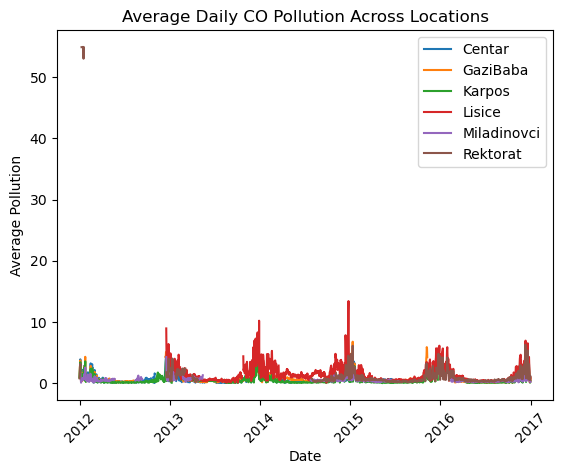

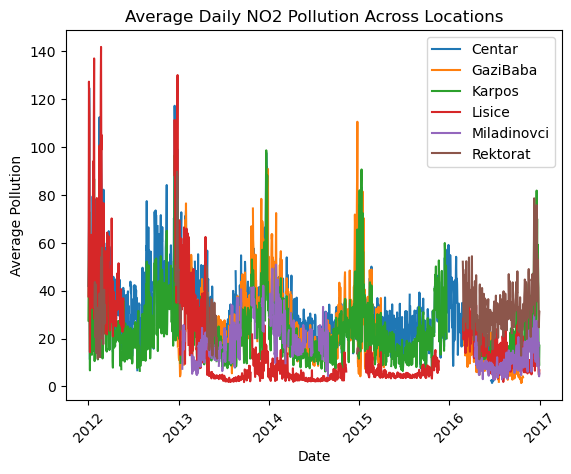

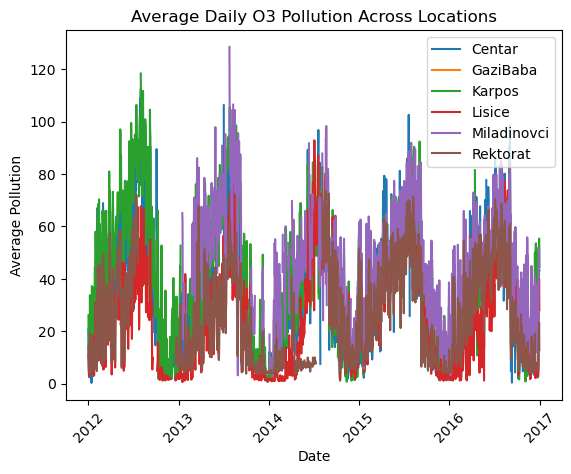

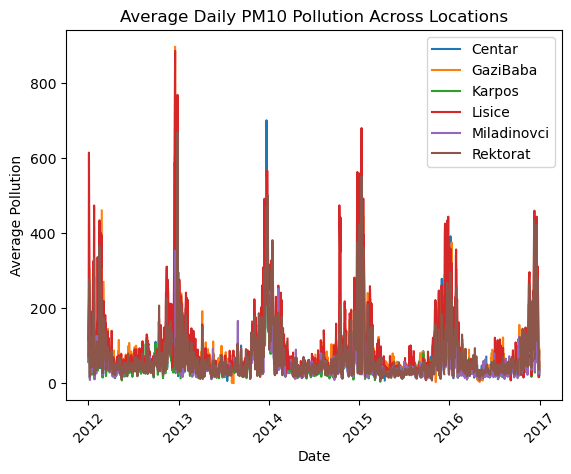

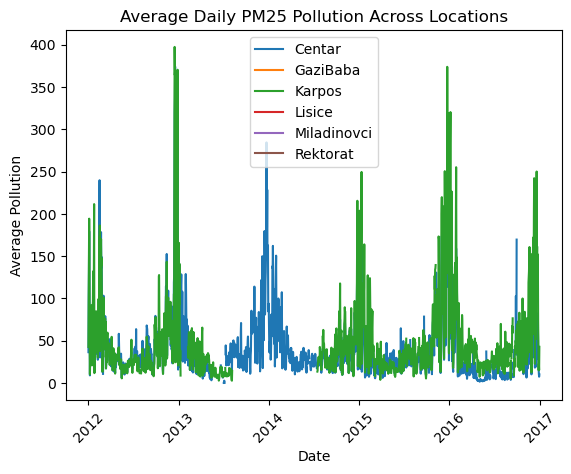

In [44]:
# Calculate the average daily pollution across locations for each pollutant
average_pollution = pollutants_df.groupby(['pollutant', 'date'])[['Centar', 'GaziBaba', 'Karpos', 'Lisice', 'Miladinovci', 'Rektorat']].mean().reset_index()

# Iterate over pollutants and create separate plots
for pollutant in pollutants_df['pollutant'].unique():
    # Filter the data for the current pollutant
    pollutant_data = average_pollution[average_pollution['pollutant'] == pollutant]
    
    # Extract the relevant data for plotting
    dates = pd.to_datetime(pollutant_data['date'])
    values = pollutant_data[['Centar', 'GaziBaba', 'Karpos', 'Lisice', 'Miladinovci', 'Rektorat']]
    
    # Create a new figure and axis for each pollutant
    fig, ax = plt.subplots()
    
    # Plot the average pollution for each location
    for location in values.columns:
        ax.plot(dates, values[location], label=location)
    
    # Set labels and title
    ax.set_xlabel('Date')
    ax.set_ylabel('Average Pollution')
    ax.set_title(f'Average Daily {pollutant} Pollution Across Locations')
    
    # Rotate x-axis tick labels for better visibility
    plt.xticks(rotation=45)
    
    # Add a legend
    ax.legend()
    
    # Display the plot
    plt.show()


## Questions 6
If the range of values for PM10 considered safe and unsafe is according to the following scale:

Good                                    0-50

Moderate 	                            51-154

Unhealthy for sensitive individuals 	155-254

Unhealthy 	                            255-354

Very unhealthy                          355-424

Hazardous                               425-504

On how many days in each year, was the average value of PM10 meauserd accross locations worse than moderate?  .......... (3 points)

Number of days worse than moderate:  date
2012    67
2013    60
2014    55
2015    61
2016    53
Name: date, dtype: int64


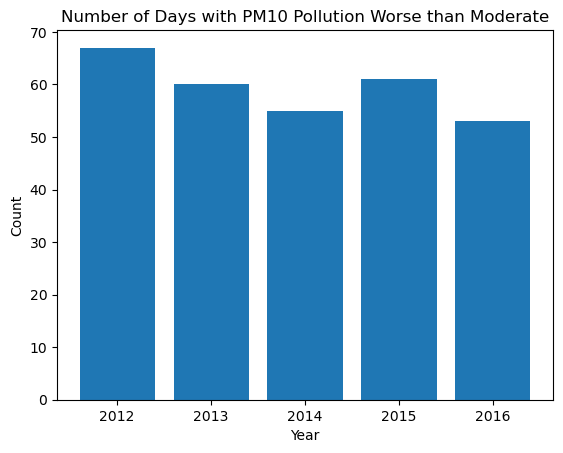

In [57]:
# Solution
# Filter the data for PM10
pm10_data = pollutants_df[pollutants_df['pollutant'] == 'PM10']

# Calculate the average daily PM10 pollution across locations for each date
average_pm10 = pm10_data.groupby('date')[['Centar', 'GaziBaba', 'Karpos', 'Lisice', 'Miladinovci', 'Rektorat']].mean().reset_index()

# Convert the date column to datetime type
average_pm10['date'] = pd.to_datetime(average_pm10['date'])

# Create a new column to categorize the pollution level for each location separately
locations = ['Centar', 'GaziBaba', 'Karpos', 'Lisice', 'Miladinovci', 'Rektorat']
for location in locations:
    average_pm10[location + '_level'] = pd.cut(average_pm10[location], bins=[0, 50, 154, 254, 354, 424, 504],
                                               labels=['Good', 'Moderate', 'Unhealthy for Sensitive Individuals',
                                                       'Unhealthy', 'Very Unhealthy', 'Hazardous'])

# Count the occurrences for each year when the pollution level is worse than 'Moderate' for any location
worse_than_moderate = average_pm10[(average_pm10[locations] > 154).any(axis=1)]
days_worse_than_moderate = worse_than_moderate.groupby(worse_than_moderate['date'].dt.year)['date'].count()

# Display the count for each year
print("Number of days worse than moderate: ", days_worse_than_moderate)

# Create a bar plot
plt.bar(days_worse_than_moderate.index, days_worse_than_moderate)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Days with PM10 Pollution Worse than Moderate')

# Display the plot
plt.show()


## Question 7
On how many days in each year, was the value of PM10 measured on at least one location worse than moderate? .......... (3 points)

date
2012    243
2013    208
2014    241
2015    190
2016    233
Name: date, dtype: int64


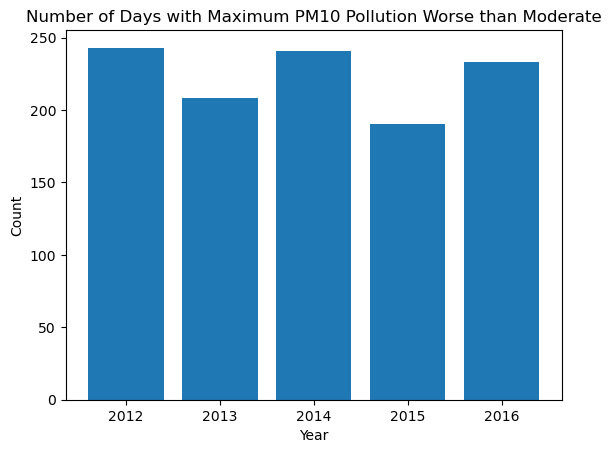

In [58]:
# Solution
# Filter the data for PM10
pm10_data = pollutants_df[pollutants_df['pollutant'] == 'PM10']

# Calculate the maximum daily PM10 pollution across locations for each date
max_pm10 = pm10_data.groupby('date')[['Centar', 'GaziBaba', 'Karpos', 'Lisice', 'Miladinovci', 'Rektorat']].max().reset_index()

# Convert the date column to datetime type
max_pm10['date'] = pd.to_datetime(max_pm10['date'])

# Count the occurrences for each year when the maximum pollution level is worse than 'Moderate' for any location
worse_than_moderate = max_pm10[(max_pm10[['Centar', 'GaziBaba', 'Karpos', 'Lisice', 'Miladinovci', 'Rektorat']] > 154).any(axis=1)]
days_worse_than_moderate = worse_than_moderate.groupby(worse_than_moderate['date'].dt.year)['date'].count()

# Display the count for each year
print(days_worse_than_moderate)

# Create a bar chart
plt.bar([str(year) for year in days_worse_than_moderate.index], days_worse_than_moderate)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Days with Maximum PM10 Pollution Worse than Moderate')

# Display the plot
plt.show()



## Question 8
Make a bar plot showing the average number of days per year when the measured value for PM10 was worse than moderate on at least one location.  .......... (3 points)

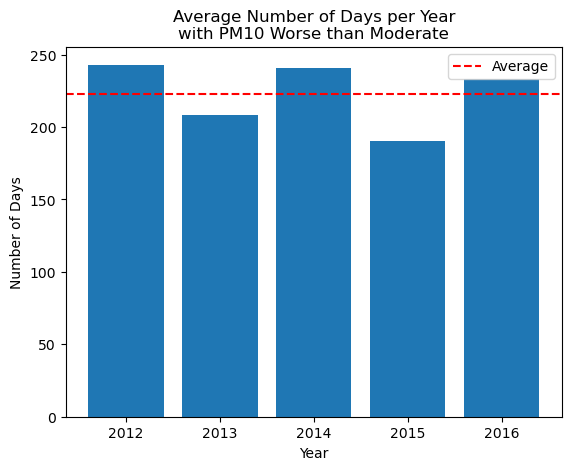

In [21]:
# Solution
# Calculate the average number of days per year when PM10 was worse than "Moderate"
average_days_worse_than_moderate = days_worse_than_moderate.mean()

# Create the bar plot
plt.bar(days_worse_than_moderate.index, days_worse_than_moderate)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.title('Average Number of Days per Year\nwith PM10 Worse than Moderate')

# Add a horizontal line for the average value
plt.axhline(y=average_days_worse_than_moderate, color='red', linestyle='--', label='Average')

# Add a legend
plt.legend()

# Display the plot
plt.show()
